In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


** Importing Necessary Packages **

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.misc
from skimage.io import imread
from glob import glob

In [4]:
from keras.layers import Conv2D, BatchNormalization, Activation
from keras.models import Model, Input
from keras.optimizers import Adam
import keras.backend as K

** Loading Images **

Only showing a small set of images from the local test set we generated.

In [13]:
clean_images_path = glob('./CelebA Images/Clean Images/*.png')
blurry_images_path = glob('./CelebA Images/Blurry Images/*.png')
Images = []; Blurry = []
for image, blurry in zip(clean_images_path, blurry_images_path):
    Images.append(imread(image))
    Blurry.append(imread(blurry))
Images = np.array(Images).astype('float32')
Blurry = np.array(Blurry).astype('float32')

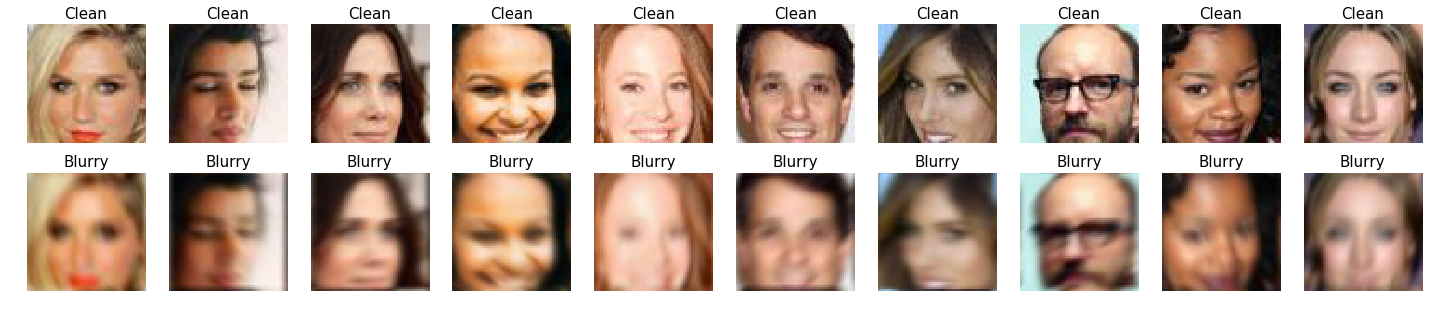

In [42]:
f, ax = plt.subplots(2,10,figsize=(25,5))
for i in range(10):
    ax[0,i].imshow(Images[i].astype('uint8'));  ax[0,i].axis('Off'); ax[0,i].set_title('Clean', size=15)
    ax[1,i].imshow(Blurry[i].astype('uint8'));  ax[1,i].axis('Off'); ax[1,i].set_title('Blurry', size=15)
plt.show()

** Defining CNN Model for Training Model **

The model has been trained on a much larger dataset of CelebA images.

In [27]:
deblur_CNN_input = Input(shape=(64,64,3))

#HIDDEN LAYERS
deblur_CNN_layer1 = Conv2D(filters=128, kernel_size=10, strides = 1, padding='same')(deblur_CNN_input)
deblur_CNN_layer1 = BatchNormalization()(deblur_CNN_layer1)
deblur_CNN_layer1 = Activation('relu')(deblur_CNN_layer1)

deblur_CNN_layer2 = Conv2D(filters=320, kernel_size=1, strides = 1, padding='same')(deblur_CNN_layer1)
deblur_CNN_layer2 = BatchNormalization()(deblur_CNN_layer2)
deblur_CNN_layer2 = Activation('relu')(deblur_CNN_layer2)

deblur_CNN_layer3 = Conv2D(filters=320, kernel_size=1, strides = 1, padding='same')(deblur_CNN_layer2)
deblur_CNN_layer1 = BatchNormalization()(deblur_CNN_layer3)
deblur_CNN_layer1 = Activation('relu')(deblur_CNN_layer3)

deblur_CNN_layer4 = Conv2D(filters=320, kernel_size=1, strides = 1, padding='same')(deblur_CNN_layer3)
deblur_CNN_layer4 = BatchNormalization()(deblur_CNN_layer4)
deblur_CNN_layer4 = Activation('relu')(deblur_CNN_layer4)

deblur_CNN_layer5 = Conv2D(filters=128, kernel_size=1, strides = 1, padding='same')(deblur_CNN_layer4)
deblur_CNN_layer5 = BatchNormalization()(deblur_CNN_layer5)
deblur_CNN_layer5 = Activation('relu')(deblur_CNN_layer5)

deblur_CNN_layer6 = Conv2D(filters=128, kernel_size=3, strides = 1, padding='same')(deblur_CNN_layer5)
deblur_CNN_layer6 = BatchNormalization()(deblur_CNN_layer6)
deblur_CNN_layer6 = Activation('relu')(deblur_CNN_layer6)

deblur_CNN_layer7 = Conv2D(filters=512, kernel_size=1, strides = 1, padding='same')(deblur_CNN_layer6)
deblur_CNN_layer7 = BatchNormalization()(deblur_CNN_layer7)
deblur_CNN_layer7 = Activation('relu')(deblur_CNN_layer7)

deblur_CNN_layer8 = Conv2D(filters=128, kernel_size=5, strides = 1, padding='same')(deblur_CNN_layer7)
deblur_CNN_layer8 = BatchNormalization()(deblur_CNN_layer8)
deblur_CNN_layer8 = Activation('relu')(deblur_CNN_layer8)

deblur_CNN_layer9 = Conv2D(filters=128, kernel_size=5, strides = 1, padding='same')(deblur_CNN_layer8)
deblur_CNN_layer9 = BatchNormalization()(deblur_CNN_layer9)
deblur_CNN_layer9 = Activation('relu')(deblur_CNN_layer9)

deblur_CNN_layer10 = Conv2D(filters=128, kernel_size=3, strides = 1, padding='same')(deblur_CNN_layer9)
deblur_CNN_layer10 = BatchNormalization()(deblur_CNN_layer10)
deblur_CNN_layer10 = Activation('relu')(deblur_CNN_layer10)

deblur_CNN_layer11 = Conv2D(filters=128, kernel_size=5, strides = 1, padding='same')(deblur_CNN_layer10)
deblur_CNN_layer11 = BatchNormalization()(deblur_CNN_layer11)
deblur_CNN_layer11 = Activation('relu')(deblur_CNN_layer11)

deblur_CNN_layer12 = Conv2D(filters=128, kernel_size=5, strides = 1, padding='same')(deblur_CNN_layer11)
deblur_CNN_layer12 = BatchNormalization()(deblur_CNN_layer12)
deblur_CNN_layer12 = Activation('relu')(deblur_CNN_layer12)

deblur_CNN_layer13 = Conv2D(filters=256, kernel_size=1, strides = 1, padding='same')(deblur_CNN_layer12)
deblur_CNN_layer13 = BatchNormalization()(deblur_CNN_layer13)
deblur_CNN_layer13 = Activation('relu')(deblur_CNN_layer13)

deblur_CNN_layer14 = Conv2D(filters=64, kernel_size=7, strides = 1, padding='same')(deblur_CNN_layer13)
deblur_CNN_layer14 = BatchNormalization()(deblur_CNN_layer14)
deblur_CNN_layer14 = Activation('relu')(deblur_CNN_layer14)

deblur_CNN_output = Conv2D(filters=3, kernel_size=7, strides = 1, padding='same', activation='relu')(deblur_CNN_layer14)

deblur_CNN = Model(inputs= deblur_CNN_input, outputs=deblur_CNN_output )

In [28]:
deblur_CNN.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 64, 64, 128)       38528     
_________________________________________________________________
batch_normalization_15 (Batc (None, 64, 64, 128)       512       
_________________________________________________________________
activation_15 (Activation)   (None, 64, 64, 128)       0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 64, 64, 320)       41280     
_________________________________________________________________
batch_normalization_16 (Batc (None, 64, 64, 320)       1280      
_________________________________________________________________
activation_16 (Activation)   (None, 64, 64, 320)       0         
__________

In [29]:
adam = Adam(lr= 0.00001)
deblur_CNN.compile(optimizer= adam, loss= 'mean_squared_error')
deblur_CNN.load_weights('celebA_deblur_cnn_weights.h5')

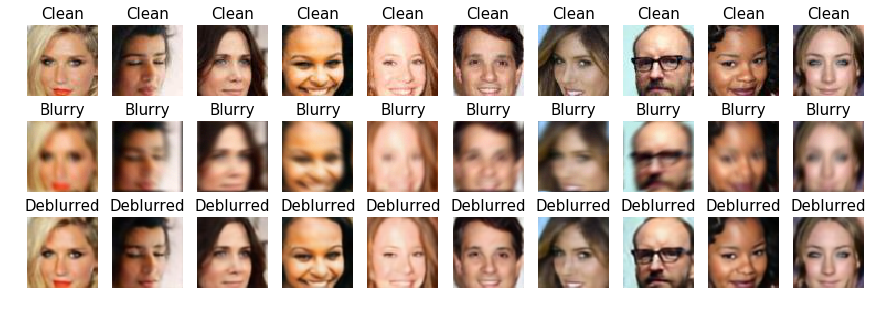

In [63]:
Deblurred = deblur_CNN.predict(Blurry)
Deblurred = np.clip(Deblurred, 0, 255)
f, ax = plt.subplots(3,10, figsize=(15,5))
for i in range(10):
    ax[0,i].imshow(Images[i].astype('uint8'));  ax[0,i].axis('Off'); ax[0,i].set_title('Clean', size=15)
    ax[1,i].imshow(Blurry[i].astype('uint8'));  ax[1,i].axis('Off'); ax[1,i].set_title('Blurry', size=15)
    ax[2,i].imshow(Deblurred[i].astype('uint8'));  ax[2,i].axis('Off'); ax[2,i].set_title('Deblurred', size=15)
plt.show()